<a href="https://colab.research.google.com/github/DD-SQUARED/University-Physics-Projects/blob/main/HR_Diagram_Isochrones_and_Observational_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

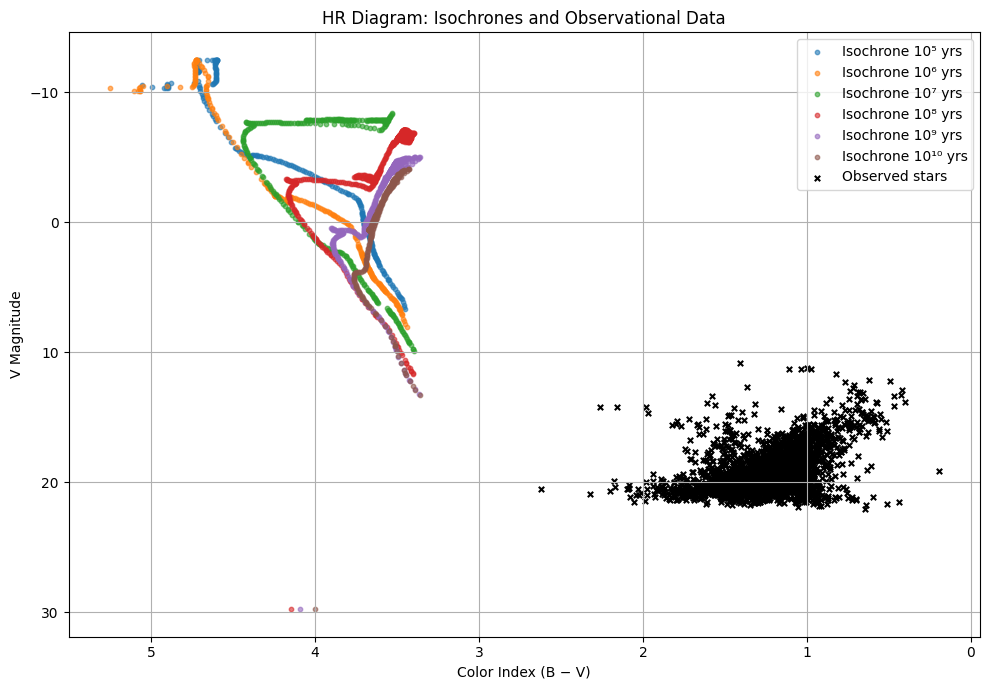

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Isochrone files and labels ---
isochrone_files = {
    '10⁵ yrs': 'year_e5.dat',
    '10⁶ yrs': 'year_e6.dat',
    '10⁷ yrs': 'year_e7.dat',
    '10⁸ yrs': 'year_e8.dat',
    '10⁹ yrs': 'year_e9.dat',
    '10¹⁰ yrs': 'year_e10.dat'
}

plt.figure(figsize=(10, 7))

# --- Plot theoretical isochrones ---
for label, path in isochrone_files.items():
    try:
        df = pd.read_csv(path, sep='\s+', comment='#', header=None)

        if df.shape[1] < 28:
            print(f"Skipped {label}: Not enough columns.")
            continue

        logTeff = df[7]
        Vmag = df[27]

        # Remove bad data
        mask = (logTeff > -99) & (Vmag > -99)
        logTeff = logTeff[mask]
        Vmag = Vmag[mask]

        if logTeff.empty or Vmag.empty:
            print(f"Skipped {label}: No clean data.")
            continue

        plt.scatter(logTeff, Vmag, s=10, label=f"Isochrone {label}", alpha=0.6)

    except Exception as e:
        print(f"Error with {label}: {e}")

# --- Plot observational data ---
try:
    obs_df = pd.read_csv('NGC_433.dat', sep='\s+', comment='#', header=None,
                         names=['star', 'x', 'y', 'V', 'B-V', 'U-B', 'dV', 'dBV', 'dUB', 'dP', 'nV', 'nB', 'nU'])

    # Clean invalid data
    obs_df = obs_df[(obs_df['V'] > -99) & (obs_df['B-V'] > -99)]

    if not obs_df.empty:
        color_index = obs_df['B-V']
        v_mag = obs_df['V']
        plt.scatter(color_index, v_mag, s=15, c='black', label='Observed stars', marker='x')
    else:
        print("Observational data: no valid points to plot.")

except Exception as e:
    print(f"Error reading observational data: {e}")

# --- Format plot like HR Diagram ---
plt.gca().invert_yaxis()  # Brighter stars at bottom
plt.gca().invert_xaxis()
plt.xlabel('Color Index (B − V)')
plt.ylabel('V Magnitude')
plt.title('HR Diagram: Isochrones and Observational Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
